In [1]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pylab as plt 
import matplotlib.lines as mlines
from matplotlib.legend import Legend
from pythonds.basic.stack import Stack
from math import *
from sklearn.neighbors import KDTree
from lrg_plot_functions import *
from lrg_sum_functions import *
from cosmo_Calc import *
from divideByTwo import *
from read_data import *
from nearNeighbors import *
from scipy import stats
from astropy import stats
import healpy as hp
from localBKG_and_interlopersHEALPix import *
# import healpy as hpy
from makeCutoutTableFunc import *
from plotHistogramProjections3D import *

In [3]:
# read in EAZY outputs
# only need 3rd, 6th, and 7th columns

# use for Mr and (Mg-Mr) color

data = open('/Users/mtownsend/eazy-photoz/inputs/OUTPUT/UVISTA_master_v4.1/UVISTA_master_v4.1.80-81.rf', 'r')
lines = data.readlines()[11:]

# print(lines)

z = []
DM = []
L_gfilter = []
L_rfilter = []

for line in lines:
    p = line.split()
    z.append(float(p[1]))
    DM.append(float(p[2]))
    L_gfilter.append(float(p[5]))
    L_rfilter.append(float(p[6]))
    
print(len(DM))
print(DM[0])
print(len(L_gfilter))
print(len(L_rfilter))
# print(type(z[0]))
zarr = np.array(z)
DMarr = np.array(DM)
L_rfilter_arr = np.array(L_rfilter)


262615
38.72
262615
262615


In [13]:
# UltraVISTA apparent magnitudes

from astropy.io import ascii
data_cat = ascii.read("/Users/mtownsend/eazy-photoz/inputs/UVISTA_master_v4.1.cat")  
# print(data_cat)   

# print(len(data_cat['gp']))
gp = data_cat['gp']
rp = data_cat['rp']
zp = data_cat['zp']

cut = np.where((np.asarray(gp) > 0.) & (np.asarray(rp) > 0.) & (np.asarray(zp) > 0.) & (np.asarray(z) > 0.))
cut0 = cut[0]
print(type(cut0))

gmag = 22.5 - 2.5 * np.log10(gp[cut0])
rmag = 22.5 - 2.5 * np.log10(rp[cut0])
zmag = 22.5 - 2.5 * np.log10(zp[cut0])

zphot = zarr[cut0]
DMarr = np.array(DM)
DM_new = DMarr[cut0]

# print(len(gmag))
# print(len(rmag))
# print(len(zmag))
print(len(zphot[np.where(zphot <= -1)]))
# print(len(DM_cut))

<class 'numpy.ndarray'>
0


In [16]:
print(cut0.shape)
print(cut0)
print(cut0[2])

(252467,)
[     2      3      4 ... 262612 262613 262614]
4


In [50]:
# calculate rest-frame magnitudes

K_correct = -2.5*np.log10((1. + zphot)**-1.)
print(len(K_correct))
# print(len(zphot[np.where(zmag <= 22.36)]))
# print(len(rmag_LRG[np.where(zmag_LRG <= 22.36)]))

Mr = rmag - DM_new - K_correct
print(len(Mr))
# Mg = gmag - DM_cut - K_correct
# print(len(Mg))


# calculate rest-frame colors

# Lg = np.array(L_gfilter)
# Lr = np.array(L_rfilter)

# grcolor_LRG = -2.5*np.log10(Lg/Lr)
# print(grcolor_LRG)

252467
252467


In [51]:
# same as previous cell but make redshift cuts

LRG_cut = np.where((zphot >= 0.2) & (zphot <= 0.65)) # & (zmag <= 22.36))

gmag_cut = gmag[LRG_cut]
rmag_cut = rmag[LRG_cut]
zmag_cut = zmag[LRG_cut]

z_cut = zphot[LRG_cut]
DM_cut = DM_new[LRG_cut]

# calculate UltraVISTA rest-frame magnitudes

K_correct_cut = -2.5*np.log10((1. + z_cut)**(-1.))

Mr_cut = rmag_cut - DM_cut - K_correct_cut
print(len(Mr_cut))


68722


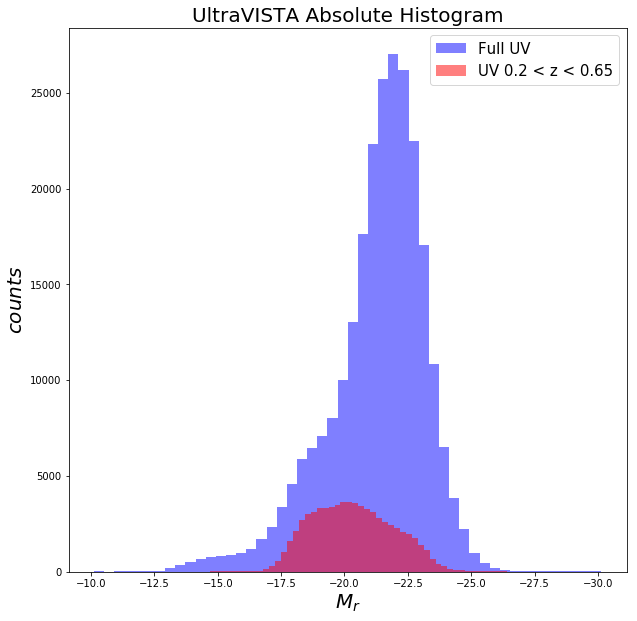

In [53]:
plt.subplots(figsize=(10,10))
plt.hist(Mr, bins=50, alpha=0.5, color='blue', label="Full UV")
plt.hist(Mr_cut, bins=50, alpha=0.5, color='red', label="UV 0.2 < z < 0.65")
plt.title("UltraVISTA Absolute Magnitude Histogram", fontsize=20)
plt.xlabel(r'$M_{r}$', fontsize=20)
plt.ylabel(r'$counts$', fontsize=20)
plt.legend(fontsize=15)
plt.gca().invert_xaxis()
plt.show()

In [21]:
# calculate UltraVISTA luminosities 

# absolute magnitudes of the sun in DECaM g, r, and z filters from Willmer ApJS, 2018
Msun_g = 5.05
Msun_r = 4.61
Msun_z = 4.50

# calculate L_g/Lsun_g
L_r = 10.**((Mr-Msun_r)/(-2.5))

print(len(L_r[np.where(L_r == 0.)]))


0


In [24]:
# calculate the above using my project cuts: (z_LRG1 >= 0.2) & (z_LRG1 <= 0.65) & (zmag_LRG <= 22.36)

# LRG_cut = np.where((zphot >= 0.2) & (zphot <= 0.65)) # & (zmag <= 22.36))

# gmag_cut = gmag[LRG_cut]
# rmag_cut = rmag[LRG_cut]
# zmag_cut = zmag[LRG_cut]

# z_cut = zphot[LRG_cut]
# DM_cut = DM_new[LRG_cut]

# # calculate UltraVISTA rest-frame magnitudes

# K_correct_cut = -2.5*np.log10((1. + z_cut)**(-1.))

# Mr_cut = rmag_cut - DM_cut - K_correct_cut
# print(len(Mr_cut))



# absolute magnitudes of the sun in DECaM g, r, and z filters from Willmer ApJS, 2018
Msun_g = 5.05
Msun_r = 4.61
Msun_z = 4.50

# calculate L_g/Lsun_g
L_r_cut = 10.**((Mr_cut-Msun_r)/(-2.5))

print(len(L_r_cut[np.where(L_r_cut == 0.)]))

68722
0


252467


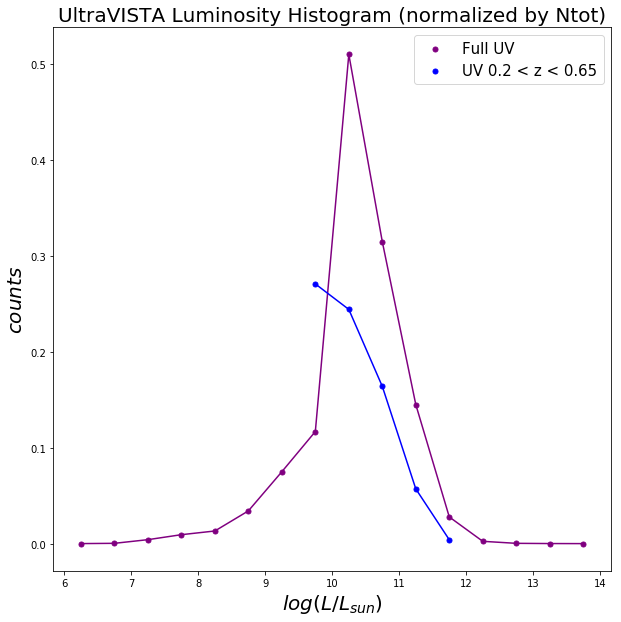

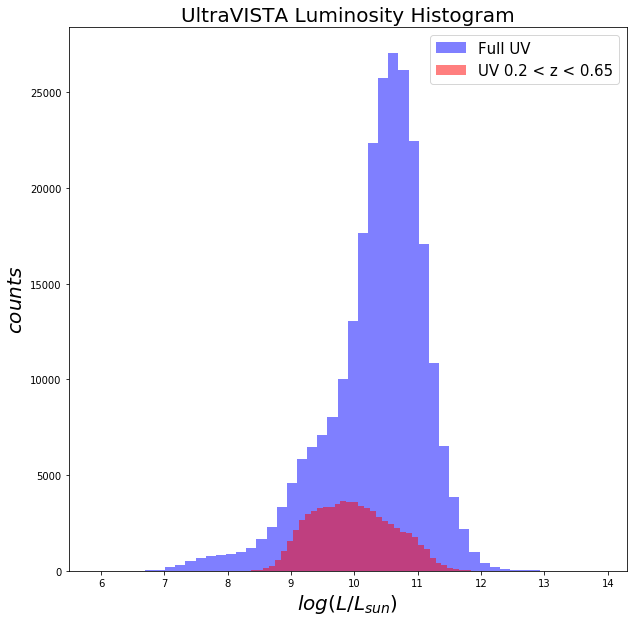

In [49]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

log_Lr = np.log10(L_r)
Ltot = len(log_Lr)
print(Ltot)

L_bin1 = log_Lr[np.where((log_Lr < 6.5))]
L_bin2 = log_Lr[np.where((log_Lr >= 6.5) & (log_Lr < 7.))]
L_bin3 = log_Lr[np.where((log_Lr >= 7.) & (log_Lr < 7.5))]
L_bin4 = log_Lr[np.where((log_Lr >= 7.5) & (log_Lr < 8.))]
L_bin5 = log_Lr[np.where((log_Lr >= 8.) & (log_Lr < 8.5))]
L_bin6 = log_Lr[np.where((log_Lr >= 8.5) & (log_Lr < 9.))]
L_bin7 = log_Lr[np.where((log_Lr >= 9.) & (log_Lr < 9.5))]
L_bin8 = log_Lr[np.where((log_Lr >= 9.5) & (log_Lr < 10.))]

L_bin9 = log_Lr[np.where((log_Lr < 10.5))]
L_bin10 = log_Lr[np.where((log_Lr >= 10.5) & (log_Lr < 11.))]
L_bin11 = log_Lr[np.where((log_Lr >= 11.) & (log_Lr < 11.5))]
L_bin12 = log_Lr[np.where((log_Lr >= 11.5) & (log_Lr < 12.))]
L_bin13 = log_Lr[np.where((log_Lr >= 12.) & (log_Lr < 12.5))]
L_bin14 = log_Lr[np.where((log_Lr >= 12.5) & (log_Lr < 13.))]
L_bin15 = log_Lr[np.where((log_Lr >= 13.) & (log_Lr < 13.5))]
L_bin16 = log_Lr[np.where((log_Lr >= 13.5))] # & (log_Lr < 14.))]

freq = np.array([len(L_bin1), len(L_bin2), len(L_bin3), len(L_bin4), len(L_bin5), len(L_bin6), len(L_bin7), len(L_bin8), len(L_bin9), len(L_bin10), len(L_bin11), len(L_bin12), len(L_bin13), len(L_bin14), len(L_bin15), len(L_bin16)]) 
Lbin = np.array([6.25, 6.75, 7.25, 7.75, 8.25, 8.75, 9.25, 9.75, 10.25, 10.75, 11.25, 11.75, 12.25, 12.75, 13.25, 13.75])

log_Lr_cut = np.log10(L_r_cut)
Ltot_cut = len(log_Lr_cut)
L_bin_cut1 = log_Lr_cut[np.where((log_Lr_cut >= 9.5) & (log_Lr_cut < 10.))]
L_bin_cut2 = log_Lr_cut[np.where((log_Lr_cut >= 10.) & (log_Lr_cut < 10.5))]
L_bin_cut3 = log_Lr_cut[np.where((log_Lr_cut >= 10.5) & (log_Lr_cut < 11.))]
L_bin_cut4 = log_Lr_cut[np.where((log_Lr_cut >= 11.) & (log_Lr_cut < 11.5))]
L_bin_cut5 = log_Lr_cut[np.where((log_Lr_cut >= 11.5))] # & (log_Lr_cut < 12.))]

freq_cut = np.array([len(L_bin_cut1), len(L_bin_cut2), len(L_bin_cut3), len(L_bin_cut4), len(L_bin_cut5)]) 
Lbin_cut = np.array([9.75, 10.25, 10.75, 11.25, 11.75])

f, ax = plt.subplots(figsize=(10,10))
ax.plot(Lbin, freq/Ltot, c='purple')
ax.scatter(Lbin, freq/Ltot, c='purple', s=25, label="Full UV")
ax.plot(Lbin_cut, freq_cut/Ltot_cut, c='blue')
ax.scatter(Lbin_cut, freq_cut/Ltot_cut, c='blue', s=25, label="UV 0.2 < z < 0.65")
plt.title("UltraVISTA Luminosity Histogram (normalized by Ntot)", fontsize=20)
plt.xlabel(r'$log(L/L_{sun})$', fontsize=20)
plt.ylabel(r'$counts$', fontsize=20)
plt.legend(fontsize=15)
# plt.savefig('/Users/mtownsend/Desktop/lum_hist_UVandUVcut_r.jpeg')
# plt.savefig('/Users/mtownsend/Desktop/lum_hist_UVandUVcut_r.pdf')
plt.show()

plt.subplots(figsize=(10,10))
plt.hist(log_Lr, bins=50, alpha=0.5, color='blue', label="Full UV")
plt.hist(log_Lr_cut, bins=50, alpha=0.5, color='red', label="UV 0.2 < z < 0.65")
plt.title("UltraVISTA Luminosity Histogram", fontsize=20)
plt.xlabel(r'$log(L/L_{sun})$', fontsize=20)
plt.ylabel(r'$counts$', fontsize=20)
plt.legend(fontsize=15)
plt.show()
